In [3]:
##importing necessary libraries for computation and analysis
import xarray as xr
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import time

add_data = '/home/cccr/roxy/matin/MTech_project/data/'

In [4]:
dataset = xr.open_dataset( add_data + "sst40yearmean.nc")
ds = xr.open_dataset( add_data + "sst.day.mean.2021.nc")
ds_40=dataset.sel(time=~((dataset.time.dt.month == 2) & (dataset.time.dt.day == 29)))

nintey_percentile = ds_40.groupby('time.dayofyear').quantile(0.9,dim='time',skipna=True)
avg_data = ds_40.groupby('time.dayofyear').mean(dim='time',skipna=True)

## Preparing DataFrame to further plot the SST and 90th percentile to Detect  MHW

In [5]:

roi = ds_40.sst[-730:-365].sel(lon=slice(89,94),lat=slice(14,19))
sst_mean_roi = roi.astype(np.float32).mean(dim=['lat','lon']).data

NinteyPercentile_spatmean = nintey_percentile.sst.sel(lon=slice(89,94),lat=slice(14,19)).astype(np.float32).mean(dim=['lat','lon']).data[:-1]
Average_spatmean = avg_data.sst.sel(lon=slice(89,94),lat=slice(14,19)).astype(np.float32).mean(dim=['lat','lon']).data[:-1]
time = pd.date_range("2020-01-01", periods=365)


SST_mean_roi = pd.DataFrame(sst_mean_roi, index = time, columns=['SST'])
NinteyPercentile_spatmean = pd.DataFrame( NinteyPercentile_spatmean, index = time, columns=['90percentile'])
Average_spatmean = pd.DataFrame( Average_spatmean, index = time, columns=['Avg40'])

DataFrame = pd.concat([SST_mean_roi, NinteyPercentile_spatmean, Average_spatmean],axis=1)


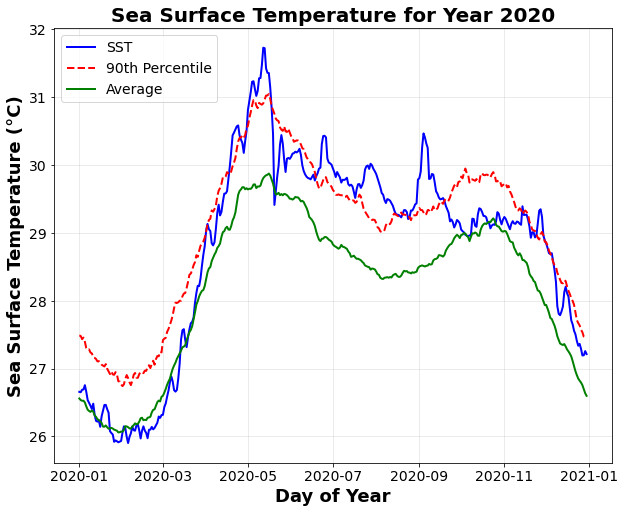

In [6]:
plt.figure(figsize=(10, 8))

plt.plot(DataFrame['SST'], color='blue', linewidth=2)

plt.plot(DataFrame['90percentile'], color='red', linestyle='--', linewidth=2)

plt.plot(DataFrame['Avg40'], color='green', linewidth=2)

plt.xlabel("Day of Year", fontsize=18, fontweight='bold')
plt.ylabel("Sea Surface Temperature (°C)", fontsize=18, fontweight='bold')
plt.title("Sea Surface Temperature for Year 2020", fontsize=20, fontweight='bold')

plt.legend(["SST", "90th Percentile", "Average"], loc="upper left", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(alpha=0.3)

plt.show()


# Smoothing of Curve

In [7]:
roi = ds_40.sst[-730:-365].sel(lon=slice(89,94),lat=slice(14,19))
sst_mean_roi = roi.astype(np.float32).mean(dim=['lat','lon']).data

rolling_mean = nintey_percentile.rename({'dayofyear':'time'}).rolling(time=11).mean()
rolling_avg = avg_data.rename({'dayofyear':'time'}).rolling(time=11).mean()
NinteyPercentile_spatmean = rolling_mean.sst.sel(lon=slice(89,94),lat=slice(14,19)).astype(np.float32).mean(dim=['lat','lon']).data[:-1]
Average_spatmean = rolling_avg.sst.sel(lon=slice(89,94),lat=slice(14,19)).astype(np.float32).mean(dim=['lat','lon']).data[:-1]
time = pd.date_range("2020-01-01", periods=365)


SST_mean_roi = pd.DataFrame(sst_mean_roi, index = time, columns=['SST'])
NinteyPercentile_spatmean = pd.DataFrame( NinteyPercentile_spatmean, index = time, columns=['90percentile'])
Average_spatmean = pd.DataFrame( Average_spatmean, index = time, columns=['Avg40'])

DataFrame = pd.concat([SST_mean_roi, NinteyPercentile_spatmean, Average_spatmean],axis=1)


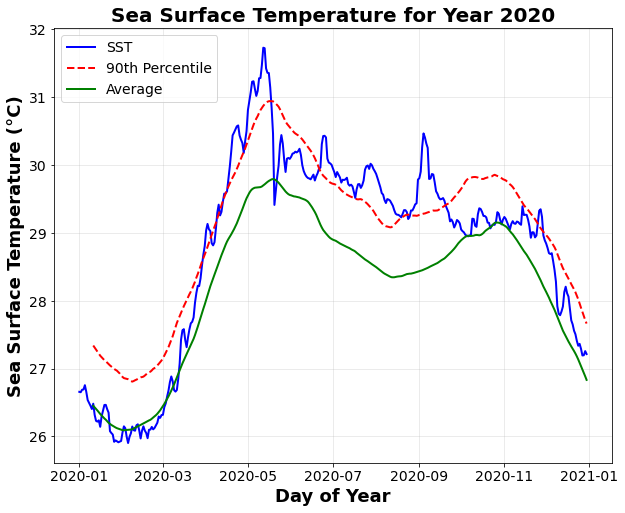

In [8]:
plt.figure(figsize=(10, 8))

plt.plot(DataFrame['SST'], color='blue', linewidth=2)

plt.plot(DataFrame['90percentile'], color='red', linestyle='--', linewidth=2)

plt.plot(DataFrame['Avg40'], color='green', linewidth=2)

plt.xlabel("Day of Year", fontsize=18, fontweight='bold')
plt.ylabel("Sea Surface Temperature (°C)", fontsize=18, fontweight='bold')
plt.title("Sea Surface Temperature for Year 2020", fontsize=20, fontweight='bold')

plt.legend(["SST", "90th Percentile", "Average"], loc="upper left", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(alpha=0.3)

plt.show()


# DETECT MHW

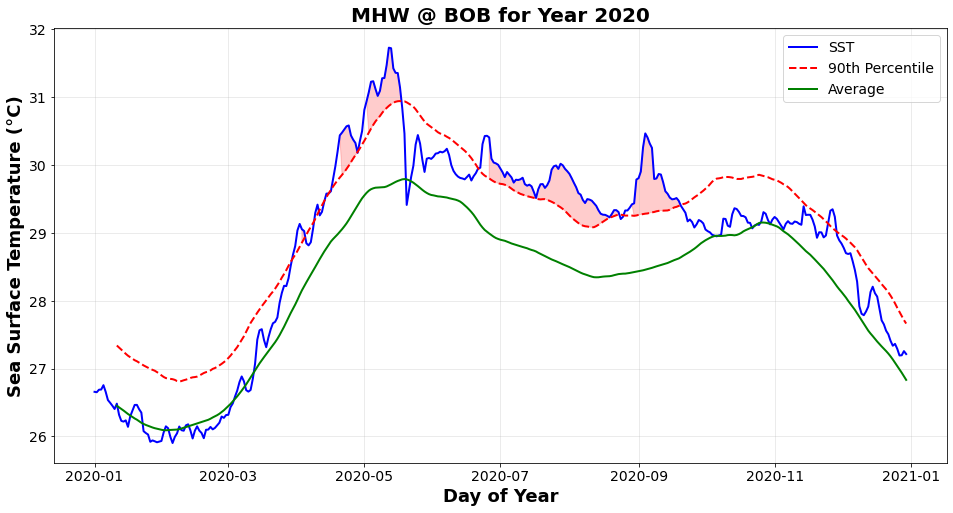

In [11]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(DataFrame['SST'], color='blue', linewidth=2, label='SST')

ax.plot(DataFrame['90percentile'], color='red', linestyle='--', linewidth=2, label='90th Percentile')

ax.plot(DataFrame['Avg40'], color='green', linewidth=2, label='Average')

mask = (DataFrame['SST'] > DataFrame['90percentile']).rolling(5).sum()>=5
ax.fill_between(DataFrame.index, DataFrame['SST'], DataFrame['90percentile'], where=mask, interpolate=True, color='red', alpha=0.2)

ax.set_xlabel("Day of Year", fontsize=18, fontweight='bold')
ax.set_ylabel("Sea Surface Temperature (°C)", fontsize=18, fontweight='bold')

ax.set_title("MHW @ BOB for Year 2020", fontsize=20, fontweight='bold')

ax.legend(loc="upper right", fontsize=14)

ax.tick_params(axis='both', labelsize=14)
ax.grid(alpha=0.3)

plt.show()
fig.savefig('MHW2020.png', bbox_inches='tight')

